# Regression with R 
R 을 사용해서 회귀분석은 통계분석의 가장 기초가 되는 분석으로, 회귀분석이란 독립변수 (X축) 종속변수 (Y축) 간의 관계를 간단하게 식으로 표현하고자 하는 분석방법이다. 일반적인 회귀분석에서 사용하는 데이터는 연속형 데이터 (나이) 와 같이 숫자로 표시되는 데이터로 구성되어야 한다. <br> 주어진 데이터의 속성에 따라서 분석방법은 다양하게 선택할 필요가 있으며, 여기서는 간단한 회귀 분석을 대상으로 설명하고자 하기 때문에 주어진 데이터를 연속형 데이터 형태로 바꾸어서 분석할 필요가 있다. 몇 가지 예를 들어 보면 서열변수, 등간변수, 명목변수 등이 있을 수 있는데 하나씩 설명을 해보면, 서열변수는 (1등~10등), 등간변수(온도 등), 비율변수(%), 명목변수(성별 등) 개인적으로 서열변수, 등간변수, 비율변수 등은 양의 상관성, 음의 상관성이 있다고 생각하기 때문에 데이터의 형태(평균,분포,4분위,편차) 등을 확인 후 정규화하여 사용하고 명목변수의 경우 OneHot 방식으로 데이터를 변경하여 사용하고 있다.  

# Working Drirecty 설정 및 데이터 로드 
Working Directory 는 R 작업을 진행하기 위한 기준 폴더가 되겠다. read.csv를 사용하여 csv 파일을 읽어서 dataframe 으로 변환하여 사용할 수 있다. 

In [2]:
setwd("/home/dev/R_study_jupyter/data")
R1 = read.csv("Regression_Data.csv")
print(R1)

   ID  X   Y X1  X2
1   1 72 176 72  93
2   2 72 172 72  82
3   3 70 182 70 109
4   4 43 160 43  69
5   5 48 163 48  74
6   6 54 165 54  75
7   7 51 168 51  85
8   8 52 163 52  71
9   9 73 182 73 107
10 10 45 148 45  37
11 11 60 170 60  84
12 12 62 166 62  73
13 13 64 172 64  87
14 14 47 160 47  67
15 15 51 163 51  72
16 16 74 170 74  76
17 17 88 182 88  98
18 18 64 174 64  92
19 19 56 164 56  71
20 20 56 160 56  61


# Summary 
summary 는 굉장히 유용하게 모든 경우에 사용되는데, 선형회귓식에 사용할 경우 모델에 대한 종합적인 정보 조회 가능 <br>
- Call : 요청 함수
- Residual : 4 분위수 
- Coef : 변수간의 상관계수, 설명변수, 편차 등 (*이 많으면 상관성이 높은 것임) 
- 종합 : R-squared (표준편차 제곱), F (설명변수), p-value(유의변수 0.05 이하 유의하다고 판단) 

In [3]:
RgFit <- lm(Y~X, data=R1)
summary(RgFit)
coef(RgFit)


Call:
lm(formula = Y ~ X, data = R1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6221  -3.2169   0.6305   2.5411   7.8515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 130.6746     5.4541   23.96 4.17e-15 ***
X             0.6211     0.0891    6.97 1.65e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.625 on 18 degrees of freedom
Multiple R-squared:  0.7297,	Adjusted R-squared:  0.7146 
F-statistic: 48.58 on 1 and 18 DF,  p-value: 1.645e-06


(Intercept)           X 
130.6745490   0.6210558

# 모델의 파라메터
아래의 내용을 식으로 나타내 보면 Y = 0.62 * X + 130 이 되겠다. 

In [11]:
coef(RgFit)

(Intercept)           X 
130.6745490   0.6210558

# 신뢰구간 
95% 신뢰구간을 구하는 예제를 보자 오차 범위를 구하려고 하면 아래와 같이 할 수 있다 <br>
- 식 : (X1 - X2) / 2
- 예 : (0.8 - 0.4) / 2 = 0.2 <br>
※ 이 모델은 신뢰구간 95%에서 +/- 0.2 

In [161]:
conf <- confint(RgFit, level=0.95)
conf

,2.5 %,97.5 %
(Intercept),119.2159634,142.1331345
X,0.4338555,0.8082561


#  모델 Y 값 출력 
생성한 모델로 예측할 결과값 전체를 출력, 별도의 데이터를 테스트할 경우 predict 사용 

In [71]:
fitted(RgFit)[0:5]

1        2        3        4        5 
175.3906 175.3906 174.1485 157.3799 160.4852

# 잔차 
모델의 예측값과 실제 데이터의 차이, 예를들어서 Y=1 , X=2 라는 데이터가 원본이고, 모델에서 예측결과 Y=1.5, X=2라고 하면 잔차는 0.5

In [121]:
#잔차 리스트 5개만 출력
residuals(RgFit)[0:5]
#잔차 제곱 합 
sum(residuals(RgFit)^2)

1          2          3          4          5 
 0.6094365 -3.3905635  7.8515480  2.6200535  2.5147747

[1] 384.9737

# 편차 (잔차제곱합)
수학 및 통계학에서 편차는 자료값 또는 변량과 평균의 차이를 나타내는 수치이다. 편차를 살펴보면 자료들이 평균을 중심으로 얼마나 퍼져 있는지를 알 수 있다.
자료값이 평균보다 크면 편차는 양의 값을, 평균보다 작으면 음의 값을 갖는다. 편차의 크기는 차이의 크기를 나타낸다.
편차의 절댓값은 절대편차, 편차의 제곱은 제곱편차라고 한다.

In [17]:
deviance(RgFit)

[1] 384.9737

# T-Test 두 변수간 평균 분산 분석 
t-test 는 등 분산성을 만족해야 함. 등분산성 검증 후 T-Test 를 실행하여 두 그룹간의 유의미한 차이가 있는지 검증한다. <br>
T-test 는 귀무가설은 두 그룹간의 차이가 있다로 P-Value 가 0.05 이하이면 차이가 있다라고 이야기 할 수 있다 <br>
아래의 예제는 X1과 X2 컬럼 데이터의 평균이 유의미한 차이가 있는지 여부를 테스트 한다. <br>
결과를 보면 p-value = 0.0001792 로 X1 과 X2의 평균은 유의미한 차이가 있다고 볼 수 있다. 

In [99]:
# 등분산 검증 
t.test(R1$X1, R1$X2)


	Welch Two Sample t-test

data:  R1$X1 and R1$X2
t = -4.1961, df = 34.626, p-value = 0.0001792
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -28.270212  -9.829788
sample estimates:
mean of x mean of y 
    60.10     79.15 


# Anova 분산분석
anvova 함수는 세그룹 이상의 집단평균을 비교할때 분산기법을 사용하는 방법 (2개일 때는 T-Test 사용)
- F :  설명력 (F는 설명되는 분산 나누기 설명 안되는 분산)
- Pr(>F) : 유의 확률 (보통 0.05 이하면 유의미하다고 판단)

※ 분산이란 변수의 흩어진 정도를 계산하는 지표이다. 분산의 제곱근인 표준편차는 어떤 변수 x에 관하여 그 평균값를 중심으로 보았을 때 각 관측값이 평균적으로 어느 정도 평균값에서 벗어나 있는지를 계산한 것이라고 생각해도 좋다. 기술통계(記述統計)의 경우 구체적인 수식은 다음과 같이 주어진다. S2 분산을 나타낼 때에 이용되는 기호의 하나이다. 기호가 대문자인 것은 표본이 아니라 모든 연구대상이 데이터에 포함되어 있다는 것을 나타내고 있다.

In [165]:
# 회귀식에 대한 검증 (P-value : 적을수록 좋다)
# Summary 하면 모델 종합나오는 그 내용과 동일
anova(RgFit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X,1,1039.0263,1039.02628,48.58117,1.645396e-06
Residuals,18,384.9737,21.38743,NA,NA



Call:
lm(formula = Y ~ X, data = R1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6221  -3.2169   0.6305   2.5411   7.8515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 130.6746     5.4541   23.96 4.17e-15 ***
X             0.6211     0.0891    6.97 1.65e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.625 on 18 degrees of freedom
Multiple R-squared:  0.7297,	Adjusted R-squared:  0.7146 
F-statistic: 48.58 on 1 and 18 DF,  p-value: 1.645e-06


# 상관분석 (Corelationship)
상관계수 분석은 별도로 지정하지 않는 경우 피어슨 상관관계를 사용하게 되며, 상관관계는 음의 상관계수, 양의 상관계수 등을 분석할 수 있으며, 값이 클 수록 그 강도가 강하다고 할 수 있다. 

In [105]:
cor_out = cor(R1$X1, R1$X2)
print(cor_out)

[1] 0.7113802


#  variance-covariance (공분산)
두변수 간의 공분산 값이 크면 두변수가의 중복되는 부분이 많다고 판단할 수 있음 <br>
X가 변할때 Y가 변하는 정도, 공분산은 편차곱을 자유도로 나눈 편차곱의 평균 <br>
- 상관계수 = 두 변수의 공분산 값 / 두 변수 공분산 최대값(두변수 표준편차 곱)
- 상관계수 : 두 변수간의 상관관계 (음의상관계수, 양의상관계수 등) 

In [170]:
cov(R1$X, R1$Y)
cov(R1$X, R1$X)
cov(R1$X, fitted(RgFit))
cov(R1)

[1] 88.05263

[1] 141.7789

[1] 88.05263

,ID,X,Y,X1,X2
ID,35.000000,5.052632,-6.631579,5.052632,-20.5000
X,5.052632,141.778947,88.052632,141.778947,139.3000
Y,-6.631579,88.052632,74.947368,88.052632,138.5263
X1,5.052632,141.778947,88.052632,141.778947,139.3000
X2,-20.500000,139.300000,138.526316,139.300000,270.4500


In [119]:
vcov(RgFit)
vcov(RgFit2)

,(Intercept),X
(Intercept),29.746930,-0.477164031
X,-0.477164,0.007939501


,(Intercept),X1,X2
(Intercept),1.690257e-02,-1.584364e-04,-8.635899e-05
X1,-1.584364e-04,8.195377e-06,-4.221172e-06
X2,-8.635899e-05,-4.221172e-06,4.296291e-06


In [43]:
data(BostonHousing)
m<-lm(medv~., data=BostonHousing)
vcov(m)

,(Intercept),crim,zn,indus,chas1,nox,rm,age,dis,rad,tax,ptratio,b,lstat
(Intercept),26.045291832,-1.079748e-02,-1.639103e-03,1.758661e-02,-0.1194878466,-1.064270e+01,-1.5132216666,5.687439e-03,-3.622194e-01,9.636633e-02,-2.099067e-03,-4.004404e-01,-3.996092e-03,-7.747541e-02
crim,-0.010797476,1.080108e-03,-3.932116e-05,7.499758e-05,0.0014167416,7.483890e-03,0.0003616131,-1.450386e-06,7.657255e-04,-5.820878e-04,1.464580e-06,9.006255e-05,1.036429e-05,-2.545176e-04
zn,-0.001639103,-3.932116e-05,1.884432e-04,8.977334e-05,-0.0001746156,1.876567e-03,-0.0008938233,2.188025e-05,-1.102528e-03,9.637500e-05,-1.152206e-05,5.588413e-04,-4.207036e-07,-3.698975e-05
indus,0.017586609,7.499758e-05,8.977334e-05,3.781720e-03,-0.0054575233,-6.200607e-02,0.0023626897,-8.951467e-07,2.589262e-03,1.135798e-03,-1.012784e-04,-1.045165e-03,5.493837e-06,-2.376212e-04
chas1,-0.119487847,1.416742e-03,-1.746156e-04,-5.457523e-03,0.7423196763,-1.104090e-01,-0.0112247218,-5.778709e-04,2.709598e-03,-6.150655e-03,3.926741e-04,1.055729e-02,-1.187408e-04,2.596924e-03
nox,-10.642697666,7.483890e-03,1.876567e-03,-6.200607e-02,-0.1104090497,1.459044e+01,0.1492051525,-1.337841e-02,2.147954e-01,-3.602624e-02,-1.071522e-03,1.647144e-01,7.681148e-04,-1.332170e-02
rm,-1.513221667,3.616131e-04,-8.938233e-04,2.362690e-03,-0.0112247218,1.492052e-01,0.1746615178,-1.141524e-03,1.113320e-02,-4.383082e-03,1.167426e-04,8.719438e-03,1.175683e-04,1.133790e-02
age,0.005687439,-1.450386e-06,2.188025e-05,-8.951467e-07,-0.0005778709,-1.337841e-02,-0.0011415236,1.744983e-04,7.675206e-04,6.643393e-05,-1.487734e-06,-1.351314e-04,-2.261154e-06,-2.285232e-04
dis,-0.362219434,7.657255e-04,-1.102528e-03,2.589262e-03,0.0027095978,2.147954e-01,0.0111332050,7.675206e-04,3.978219e-02,2.097953e-04,-1.460167e-05,-2.442762e-03,1.176627e-05,-3.889020e-04
rad,0.096366325,-5.820878e-04,9.637500e-05,1.135798e-03,-0.0061506553,-3.602624e-02,-0.0043830820,6.643393e-05,2.097953e-04,4.401850e-03,-1.965951e-04,-1.639807e-03,1.289601e-05,-1.199585e-04


# 

In [141]:
summary(influence(RgFit))
influence(RgFit)$coefficients

             Length Class  Mode   
hat          20     -none- numeric
coefficients 40     -none- numeric
sigma        20     -none- numeric
wt.res       20     -none- numeric

,(Intercept),X
1,-0.146340384,2.999915e-03
2,0.814155996,-1.668985e-02
3,-1.468476512,3.158357e-02
4,1.343605302,-1.976570e-02
5,0.898364607,-1.261192e-02
6,0.156725101,-1.907088e-03
7,1.555601341,-2.076874e-02
8,0.007614936,-9.924534e-05
9,-1.603275251,3.228575e-02
10,-4.748963541,6.880575e-02


# 시각화
- Residuals vs fitted : 잔차와 예측값 
- Scale-Location : 
- Normal Q-Q : 
- Residual vs Leverage : 
- Cook's Distance : 
- Cook's Distance vs Leverage : 

[1] 5.1 4.1 4.1 2.1

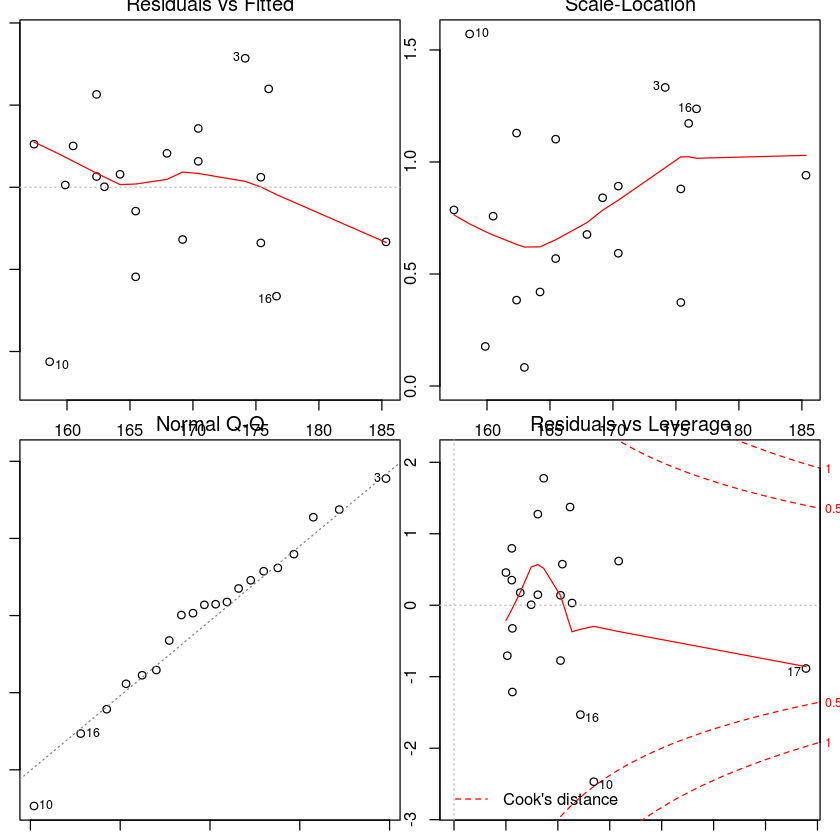

In [48]:
#graphics.off()
par("mar")
par(mar=c(1,1,1,1))
layout(matrix(c(1,2,3,4),2,2))
plot(RgFit)

[1] 5.1 4.1 4.1 2.1

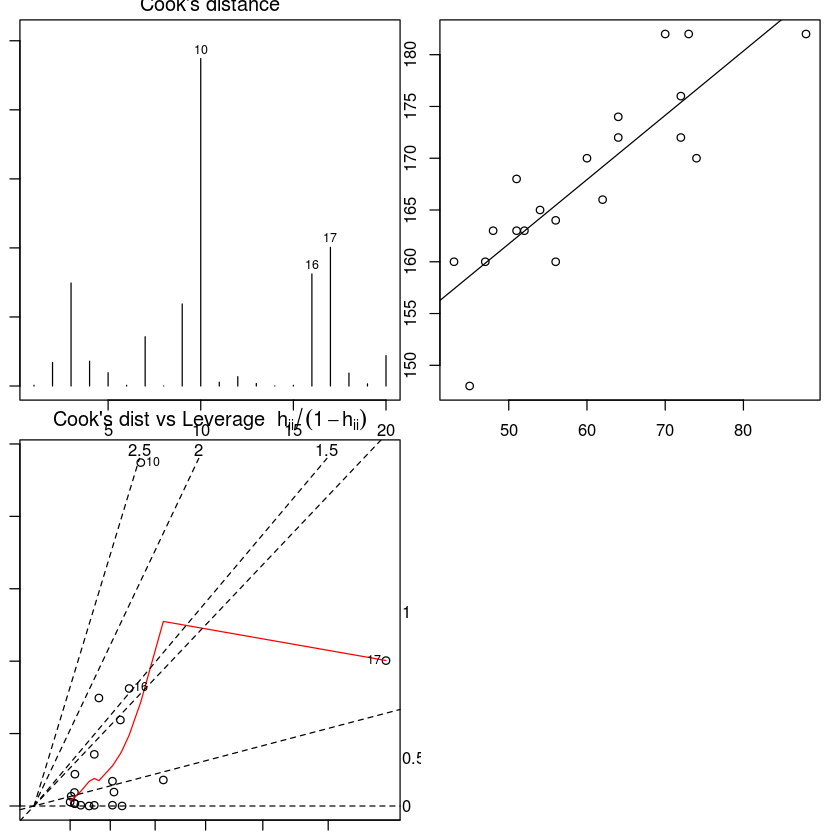

In [70]:
par("mar")
par(mar=c(1,1,1,1))
layout(matrix(c(1,2,3,4),2,2))
# 출력하고자하는 Plot 을 선택 
plot(RgFit,which=c(4,6))
plot(Y~X,data=R1)
abline(coef(RgFit))

# 다중 공선성 확인
다중공선성을 독립변수간의 상관관계가 너무 높아 둘중 하나를 제거해야 하는 CASE 를 말한다. 이를 확인하기 위한 라이브러리가 지원된다. <br>
보통의 경우 다중공선성이 큰 데이터가 있는 경우 둘중하나를 삭제하도록 한다. 보통 값이 2.5가 넘으면 다중 공선성이 있다고 이야기 한다. 

In [181]:
#install.packages("car")
library(car)
R2 = read.csv("Regression_Data.csv")
R2$TEMP = R2$X^2
RgFit2 <- lm(Y~X1 + X2 + TEMP, data=R2)
vif(RgFit2)

X1         X2       TEMP 
103.805724   2.146837  97.883918

# 함수의 변환
log, 제곱 등 다양한 식의 변환방법을 확인해보자. 데이터를 변환할 때는 I(아이) 함수를 사용해야 한다. 이를 응용하여 비선형 회귀 분석등에 사용할 수 있다. 

In [32]:
x<-1:1000
y<-x^2+3*x+5+rnorm(1000)
lm(y~I(x^2)+x)

x<-101:200
y<-exp(3*x+rnorm(100))
lm(log(y)~x)

x<-101:200
y<-log(x)+rnorm(100)
lm(y~log(x))

x1<-1:10000
x2<-3*x1
y<-3*(x1+x2)+rnorm(1000)
lm(y~x1+x2)



Call:
lm(formula = y ~ I(x^2) + x)

Coefficients:
(Intercept)       I(x^2)            x  
      4.883        1.000        3.001  



Call:
lm(formula = log(y) ~ x)

Coefficients:
(Intercept)            x  
     0.4942       2.9973  



Call:
lm(formula = y ~ log(x))

Coefficients:
(Intercept)       log(x)  
     0.2826       0.9289  



Call:
lm(formula = y ~ x1 + x2)

Coefficients:
(Intercept)           x1           x2  
    0.06079     12.00000           NA  


# 다중회귀 분석을 접근하는 3가지 방법
- forward : 변수를 하나씩 넣어 가면서 최적의 모델을 찾는 방법 
- backward : 변수를 다 넣어 놓고 하나씩 빼면서 확인하면서 최적의 모델을 찾는 방법
- both : forward와 backward를 적절히 섞어서 사용하는 방법  <br>
위와 같은 방법을 자동으로 수행하는 Package 를 사용하여 다중회귀 분석을 진행해보자 

In [46]:
#install.packages("mlbench")
library(mlbench)
data(BostonHousing)
m<-lm(medv~., data=BostonHousing)
m2<-step(m, directory="both")
formula(m2)
m3<-step(m, directory="forward")
formula(m3)
m4<-step(m, directory="backward")
formula(m4)

Start:  AIC=1589.64
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + b + lstat

          Df Sum of Sq   RSS    AIC
- age      1      0.06 11079 1587.7
- indus    1      2.52 11081 1587.8
<none>                 11079 1589.6
- chas     1    218.97 11298 1597.5
- tax      1    242.26 11321 1598.6
- crim     1    243.22 11322 1598.6
- zn       1    257.49 11336 1599.3
- b        1    270.63 11349 1599.8
- rad      1    479.15 11558 1609.1
- nox      1    487.16 11566 1609.4
- ptratio  1   1194.23 12273 1639.4
- dis      1   1232.41 12311 1641.0
- rm       1   1871.32 12950 1666.6
- lstat    1   2410.84 13490 1687.3

Step:  AIC=1587.65
medv ~ crim + zn + indus + chas + nox + rm + dis + rad + tax + 
    ptratio + b + lstat

          Df Sum of Sq   RSS    AIC
- indus    1      2.52 11081 1585.8
<none>                 11079 1587.7
- chas     1    219.91 11299 1595.6
- tax      1    242.24 11321 1596.6
- crim     1    243.20 11322 1596.6
- zn       1    260.

medv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + 
    b + lstat

Start:  AIC=1589.64
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + b + lstat

          Df Sum of Sq   RSS    AIC
- age      1      0.06 11079 1587.7
- indus    1      2.52 11081 1587.8
<none>                 11079 1589.6
- chas     1    218.97 11298 1597.5
- tax      1    242.26 11321 1598.6
- crim     1    243.22 11322 1598.6
- zn       1    257.49 11336 1599.3
- b        1    270.63 11349 1599.8
- rad      1    479.15 11558 1609.1
- nox      1    487.16 11566 1609.4
- ptratio  1   1194.23 12273 1639.4
- dis      1   1232.41 12311 1641.0
- rm       1   1871.32 12950 1666.6
- lstat    1   2410.84 13490 1687.3

Step:  AIC=1587.65
medv ~ crim + zn + indus + chas + nox + rm + dis + rad + tax + 
    ptratio + b + lstat

          Df Sum of Sq   RSS    AIC
- indus    1      2.52 11081 1585.8
<none>                 11079 1587.7
- chas     1    219.91 11299 1595.6
- tax      1    242.24 11321 1596.6
- crim     1    243.20 11322 1596.6
- zn       1    260.

medv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + 
    b + lstat

Start:  AIC=1589.64
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + b + lstat

          Df Sum of Sq   RSS    AIC
- age      1      0.06 11079 1587.7
- indus    1      2.52 11081 1587.8
<none>                 11079 1589.6
- chas     1    218.97 11298 1597.5
- tax      1    242.26 11321 1598.6
- crim     1    243.22 11322 1598.6
- zn       1    257.49 11336 1599.3
- b        1    270.63 11349 1599.8
- rad      1    479.15 11558 1609.1
- nox      1    487.16 11566 1609.4
- ptratio  1   1194.23 12273 1639.4
- dis      1   1232.41 12311 1641.0
- rm       1   1871.32 12950 1666.6
- lstat    1   2410.84 13490 1687.3

Step:  AIC=1587.65
medv ~ crim + zn + indus + chas + nox + rm + dis + rad + tax + 
    ptratio + b + lstat

          Df Sum of Sq   RSS    AIC
- indus    1      2.52 11081 1585.8
<none>                 11079 1587.7
- chas     1    219.91 11299 1595.6
- tax      1    242.24 11321 1596.6
- crim     1    243.20 11322 1596.6
- zn       1    260.

medv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + 
    b + lstat

# 로지스틱 회귀분석 
Y 변수가 True / False 와 같은 형태일때 주로 사용하며, Email 의 Spam 여부 등이 그 예가 된다고 볼 수 있다 . 

In [64]:
# 변수중에서 Species 가 특정한 경우인 데이터만 추출 
d<-subset(iris, Species=="virginica" | Species =="versicolor")
# Species 를 숫자가 아닌 Factor 로 사용하도록 변경 
d$Species<-factor(d$Species)
# Species 종속변수로하여 모든 변수를 X 인자로 사용하여 Logistic 분석 
(m<-glm(formula=Species ~., family="binomial", data=d)) 
# 특정구간 데이터를 예측하여 본다 
f<-fitted(m)
# 예측된 결과는 0~1 사이의 값으로 0.5 이상은 1, 나머지는 0으로 
# 테스트 데이터와 비교하여 True Flase 로 판단한다. 
is_correct<-(ifelse(f>.5, 1, 0) == as.numeric(d$Species)-1)
# Sum 은 True 인 값만 Count 한다 
sum(is_correct)/NROW(is_correct)
# 별도의 데이터를 넣어서 예측
predict(m, newdata=d[c(1,10,55),], type="response")


Call:  glm(formula = Species ~ ., family = "binomial", data = d)

Coefficients:
 (Intercept)  Sepal.Length   Sepal.Width  Petal.Length   Petal.Width  
     -42.638        -2.465        -6.681         9.429        18.286  

Degrees of Freedom: 99 Total (i.e. Null);  95 Residual
Null Deviance:	    138.6 
Residual Deviance: 11.9 	AIC: 21.9

[1] 0.98

51           60          105 
1.171672e-05 1.481064e-05 9.999999e-01

# Multinomial 로지스틱 회귀 분석 
위에서는 3개의 Class 중에서 두개를 뽑아서 로지스특 회귀 분석을 사용하여 보았다. 이번에는 Y 에서 분류하고자하는 Class 가 3개 이상인 경우에 대해서 라이브러리를 사용하여 보자. 결과를 해석하는 방법은 동일하다. 

In [61]:
#install.packages("nnet")
#다항 로지스틱 분석을 위한 라이브러리
library(nnet)
#multinom는 멀티노미널 함수 
#Y 는 Species X는 전체 
(m<-multinom(Species ~., data=iris))
# 1번, 51번 101버너 데이터를 예측해보자 
# 예측 값을 Class 값을 출력 
predict(m, newdata=iris[c(1,51,101),], type="class")
# 각 Class 에 대한 예측 확률까지 포함하여 출력 
predict(m, newdata=iris[c(1,51,101),], type="probs")
# 전체 데이터 예측 
predicted<-predict(m, newdata=iris)
# 예측한 데이터의 정합성 
sum(predicted==iris$Species)/NROW(predicted)
# Class별 분류표 작성 
xtabs(~ predicted + iris$Species)

# weights:  18 (10 variable)
initial  value 164.791843 
iter  10 value 16.177348
iter  20 value 7.111438
iter  30 value 6.182999
iter  40 value 5.984028
iter  50 value 5.961278
iter  60 value 5.954900
iter  70 value 5.951851
iter  80 value 5.950343
iter  90 value 5.949904
iter 100 value 5.949867
final  value 5.949867 
stopped after 100 iterations


Call:
multinom(formula = Species ~ ., data = iris)

Coefficients:
           (Intercept) Sepal.Length Sepal.Width Petal.Length Petal.Width
versicolor    18.69037    -5.458424   -8.707401     14.24477   -3.097684
virginica    -23.83628    -7.923634  -15.370769     23.65978   15.135301

Residual Deviance: 11.89973 
AIC: 31.89973 

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

,setosa,versicolor,virginica
1,1.000000e+00,1.526406e-09,2.716417e-36
51,2.427101e-07,9.999877e-01,1.201699e-05
101,9.453717e-25,2.718072e-10,1.000000e+00


[1] 0.9866667

            iris$Species
predicted    setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         1
  virginica       0          1        49

# 시험 문제 

In [26]:
setwd("/home/dev/R_study_jupyter/data")
test_data = read.csv("power_demand.csv")
names(test_data)
print(test_data)
library(mlbench)     # 다항 회귀 분석 자동 패키지
library(car)         # 주성분분석 패키지
library(psych)       # 다중 공선성 확인 패키지 
library(GPArotation) # 다중 공선성 확인 패키지 

[1] "Date"       "PEAK_HOUR"  "REAL_LOAD"  "AVG_TMPR"   "MIN_TMPR"  
 [6] "MAX_TMPR"   "RAIN_AMT"   "CLD_AMT"    "SUN_HOUR"   "HOLIDAY_YN"

           Date PEAK_HOUR REAL_LOAD AVG_TMPR MIN_TMPR MAX_TMPR RAIN_AMT CLD_AMT
1      2013.1.1         1     59796    -4.89   -9.174    -0.05    0.000   2.457
2      2013.1.2        24     59173   -2.986   -7.223    2.674    0.000   0.103
3      2013.1.3        12     71768   -2.682   -7.027    1.591    0.000   4.689
4      2013.1.4        12     71697   -1.927   -5.512    1.149    0.000   5.111
5      2013.1.5        11     71845   -1.263   -4.408    1.866    0.000    6.06
6      2013.1.6        11     73012   -4.524   -6.952   -1.337    0.000    1.55
7      2013.1.7        11     73676   -4.878   -9.102    0.068    0.000   0.143
8      2013.1.8        11     65100   -1.797   -7.387    3.229    0.000   4.416
9      2013.1.9        24     61861   -3.591   -7.896    1.474    0.000   3.267
10    2013.1.10        11     74327   -6.199  -10.145   -1.517    0.000    1.55
11    2013.1.11        11     74357   -3.492   -7.462    0.647    0.000   5.983
12    2013.1.12        11     74212   -5

# 데이터 전처리

In [27]:
# Y/N 데이터 처리를 위한 Function
translate<-function(x){
   if (x !='Y'){
      return (0) 
   }else{
      return (1)
  }
}

In [28]:
# 데이터를 숫자로 변경한다 .
test_data$AVG_TMPR = as.numeric(test_data$AVG_TMPR)
test_data$CLD_AMT = as.numeric(test_data$CLD_AMT)
test_data$MIN_TMPR = as.numeric(test_data$MIN_TMPR)
test_data$MAX_TMPR = as.numeric(test_data$MAX_TMPR)
test_data$SUN_HOUR = as.numeric(test_data$SUN_HOUR)
# 날짜 값을 제외한다. 
test_data = test_data[ , -which(names(test_data) %in% c("Date"))]
# 혹시 NA 가 있는 경우 0으로 처리한다 .
test_data[is.na(test_data$CLD_AMT)] <- 0 
# Holy Day 를 0,1 boolean 으로 변환 
mapply(translate, test_data$HOLIDAY_YN)       
test_data$HOLIDAY_YN = mapply(translate, test_data$HOLIDAY_YN)

[1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 [519] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [889] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0
[1000] 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0

#  다중 공선성 확인 (SKIP) 

In [61]:
names(model$coefficients )
vif(model)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"

ERROR: Error in vif.default(model): there are aliased coefficients in the model


#  주성분 분석 (SKIP)

In [27]:
names(test_data)
prv<-principal(test_data, nfactors=3, rotate="varimax")
# PCA 함수에서 사용가능한 변수 및 함수 
names(prv)
# 주성분 2개만 사용하면 될 듯 
plot(prv$values, type='b')

[1] "PEAK_HOUR"  "REAL_LOAD"  "AVG_TMPR"   "MIN_TMPR"   "MAX_TMPR"  
[6] "RAIN_AMT"   "CLD_AMT"    "SUN_HOUR"   "HOLIDAY_YN"

ERROR: Error in cor(r, use = "pairwise"): 'x' must be numeric


In [30]:
# 모델을 생성한다 
model = lm(REAL_LOAD~PEAK_HOUR+AVG_TMPR+MIN_TMPR+MAX_TMPR+RAIN_AMT+CLD_AMT+SUN_HOUR+HOLIDAY_YN , data=test_data)
summary(model)

# 너무 오래 걸림 PASS 
# m4<-step(model, directory="backward")
# formula(m4)

# COR 사용 상관관계 분석 (다중 공선성 확인을 위함 )
cor(test_data)
cor(test_data$MIN_TMPR, test_data$MAX_TMPR)  # 별로 안 높음 
cor(test_data$HOLIDAY_YN  , test_data$PEAK_HOUR)  # 이건 좀 높다 (둘중에 하나 제외하자)
cor(test_data$SUN_HOUR, test_data$PEAK_HOUR)  # 별로 안높음

# 모델을 생성한다 
model = lm(REAL_LOAD~MIN_TMPR+MAX_TMPR+SUN_HOUR+PEAK_HOUR , data=test_data)
summary(model)

# 회귀식 
coef(model)

# 신뢰구간을 구한다 
confint(model)



Call:
lm(formula = REAL_LOAD ~ PEAK_HOUR + AVG_TMPR + MIN_TMPR + MAX_TMPR + 
    RAIN_AMT + CLD_AMT + SUN_HOUR + HOLIDAY_YN, data = test_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-20144.2  -3840.5    -85.5   3931.2  18287.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 69199.4121   837.2187  82.654  < 2e-16 ***
PEAK_HOUR    -474.2601    38.6763 -12.262  < 2e-16 ***
AVG_TMPR        0.7118     0.6689   1.064  0.28753    
MIN_TMPR       -3.1916     0.6875  -4.642 3.87e-06 ***
MAX_TMPR        3.3238     0.6276   5.296 1.43e-07 ***
RAIN_AMT       18.9222    18.4825   1.024  0.30616    
CLD_AMT        -0.2681     0.7470  -0.359  0.71977    
SUN_HOUR        2.1836     0.6801   3.211  0.00136 ** 
HOLIDAY_YN  -4440.6850   701.4990  -6.330 3.57e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6034 on 1086 degrees of freedom
Multiple R-squared:  0.2304,	Adjusted R-squared:  0.2247 
F-st

,PEAK_HOUR,REAL_LOAD,AVG_TMPR,MIN_TMPR,MAX_TMPR,RAIN_AMT,CLD_AMT,SUN_HOUR,HOLIDAY_YN
PEAK_HOUR,1.00000000,-0.39059081,0.11835242,0.24385483,-1.351190e-03,0.02085134,0.04905832,-0.01376810,1.050655e-01
REAL_LOAD,-0.39059081,1.00000000,-0.01300213,-0.22411134,1.588753e-01,-0.02817996,-0.05538022,0.09723525,-1.932109e-01
AVG_TMPR,0.11835242,-0.01300213,1.00000000,0.34769880,2.554826e-01,0.07995959,0.22741624,-0.13145965,-1.116079e-01
MIN_TMPR,0.24385483,-0.22411134,0.34769880,1.00000000,-6.787988e-02,0.13974181,0.28314436,-0.18021227,-9.529691e-02
MAX_TMPR,-0.00135119,0.15887530,0.25548256,-0.06787988,1.000000e+00,-0.01231081,0.14890663,-0.07725811,-7.717045e-05
RAIN_AMT,0.02085134,-0.02817996,0.07995959,0.13974181,-1.231081e-02,1.00000000,0.33764205,-0.32942172,-2.035673e-02
CLD_AMT,0.04905832,-0.05538022,0.22741624,0.28314436,1.489066e-01,0.33764205,1.00000000,-0.38615257,-5.801340e-02
SUN_HOUR,-0.01376810,0.09723525,-0.13145965,-0.18021227,-7.725811e-02,-0.32942172,-0.38615257,1.00000000,4.285371e-02
HOLIDAY_YN,0.10506551,-0.19321085,-0.11160793,-0.09529691,-7.717045e-05,-0.02035673,-0.05801340,0.04285371,1.000000e+00


[1] -0.06787988

[1] 0.1050655

[1] -0.0137681


Call:
lm(formula = REAL_LOAD ~ MIN_TMPR + MAX_TMPR + SUN_HOUR + PEAK_HOUR, 
    data = test_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24640.7  -3976.9    116.9   4105.4  17231.1 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 69285.4822   792.5615  87.420  < 2e-16 ***
MIN_TMPR       -2.4639     0.6402  -3.849 0.000126 ***
MAX_TMPR        3.4894     0.6046   5.772 1.02e-08 ***
SUN_HOUR        1.9331     0.6324   3.057 0.002290 ** 
PEAK_HOUR    -505.2299    38.9806 -12.961  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6143 on 1090 degrees of freedom
Multiple R-squared:  0.1994,	Adjusted R-squared:  0.1965 
F-statistic: 67.88 on 4 and 1090 DF,  p-value: < 2.2e-16


(Intercept)     MIN_TMPR     MAX_TMPR     SUN_HOUR    PEAK_HOUR 
69285.482168    -2.463908     3.489421     1.933149  -505.229878

,2.5 %,97.5 %
(Intercept),67730.3632797,70840.601056
MIN_TMPR,-3.7200410,-1.207775
MAX_TMPR,2.3032027,4.675640
SUN_HOUR,0.6923395,3.173959
PEAK_HOUR,-581.7152878,-428.744467
